# Parkinson's Disease - Hybrid Functional Petri Net (HFPN)
This script has implemented the following blocks of the HFPN for PD:
- [ ] Cholesterol homeostasis
- [x] Calcium homeotasis
- [ ] Energy metabolism
- [ ] Lewy bodies formation

Implemented data and parameter optimisation
- [ ] Cholesterol homeostasis
- [x] Calcium homeotasis
- [ ] Energy metabolism
- [ ] Lewy bodies formation
- [ ] ER retraction

### Add your imports

In [1]:
import os
import sys

# Only run this cell once to avoid confusion with directories
# Point this to the directory where HFPN.py is relative to your working directory
cwd = os.getcwd() # Get current working directory
root_folder = os.sep + "team-project"
# Move to 'utils' from current directory position
sys.path.insert(0, cwd[:(cwd.index(root_folder)+len(root_folder))] + os.sep + "utils" + os.sep)

# Import HFPN class to work with hybrid functional Petri nets
from hfpn import HFPN

sys.path.insert(0, cwd[:(cwd.index(root_folder)+len(root_folder))] + os.sep + "parkinsons" + os.sep)
# Import initial token, firing conditions and rate functions
from initial_tokens import *
from rate_functions import *
from firing_conditions import *
from visualisation import Analysis

### Initialise an empty HFPN

In [2]:
# Initialize an empty HFPN
pn = HFPN(time_step = 0.01) #unit = s/A.U.

## Define the places by module
Note - if a transition links two modules, put the transition under the module that contains the input places

### Calcium homeostasis places

In [3]:
pn.add_place(it_p_Ca_cyto, "p_Ca_cyto", "Ca - cytosole", continuous = True)
pn.add_place(it_p_Ca_mito, "p_Ca_mito","Ca - mitochondria", continuous = True)
pn.add_place(it_p_Ca_ER, "p_Ca_ER", "Ca - ER", continuous = True)
pn.add_place(it_p_ADP, "p_ADP","ADP - Calcium ER import", continuous = True)
pn.add_place(it_p_ATP, "p_ATP","ATP - Calcium ER import", continuous = True)

# Discrete on/of-switches calcium pacemaking

pn.add_place(1, "p_Ca_extra", "on1 - Ca - extracellular", continuous = False)
pn.add_place(0, "p_on2","on2", continuous = False)
pn.add_place(0, "p_on3","on3", continuous = False)
pn.add_place(0, "p_on4","on4", continuous = False)

pn.add_place(it_p_LRRK2_mut, "p_LRRK2_mut","LRRK2 - mutated", continuous = True)

## Define the transitions by module
Note - if a transition links two modules, put the transition under the module that contains the input places

### Calcium homeostasis transitions

In [4]:
pn.add_transition_with_speed_function(
                    transition_id = 't_Ca_imp',
                    label = 'L-type Ca channel',
                    input_place_ids = ['p_Ca_extra'],
                    firing_condition = fc_t_Ca_imp,
                    reaction_speed_function = r_t_Ca_imp,
                    consumption_coefficients = [0], # Need to review this 
                    output_place_ids = ['p_Ca_cyto'],         
                    production_coefficients = [1]) # Need to review this 

# pn.add_transition_with_speed_function(
#                     transition_id = 't_Ca_imp2',
#                     label = 'L-type Ca channel',
#                     input_place_ids = [],
#                     firing_condition = lambda a: 1,
#                     reaction_speed_function = lambda a: 1.44*1e8,
#                     consumption_coefficients = [], # Need to review this 
#                     output_place_ids = ['p_Ca_cyto'],         
#                     production_coefficients = [1]) # Need to review this 


pn.add_transition_with_speed_function(
                    transition_id = 't_mCU',
                    label = 'Ca import into mitochondria via mCU',
                    input_place_ids = ['p_Ca_cyto','p_Ca_mito'],
                    firing_condition = fc_t_mCU,
                    reaction_speed_function = r_t_mCU,
                    consumption_coefficients = [1,0], 
                    output_place_ids = ['p_Ca_mito'],         
                    production_coefficients = [1]) 

pn.add_transition_with_speed_function(
                    transition_id = 't_MAM',
                    label = 'Ca transport from ER to mitochondria',
                    input_place_ids = ['p_Ca_ER','p_Ca_mito'],
                    firing_condition = fc_t_MAM,
                    reaction_speed_function = r_t_MAM,
                    consumption_coefficients = [1,0], 
                    output_place_ids = ['p_Ca_mito'],         
                    production_coefficients = [1]) 

pn.add_transition_with_speed_function(
                    transition_id = 't_RyR_IP3R',
                    label = 'Ca export from ER',
                    input_place_ids = ['p_Ca_extra','p_Ca_ER'],
                    firing_condition = fc_t_RyR_IP3R,
                    reaction_speed_function = r_t_RyR_IP3R,
                    consumption_coefficients = [0,1], 
                    output_place_ids = ['p_Ca_cyto'],         
                    production_coefficients = [1]) 

pn.add_transition_with_speed_function(
                    transition_id = 't_SERCA',
                    label = 'Ca import to ER',
                    input_place_ids = ['p_Ca_cyto','p_ATP'],
                    firing_condition = fc_t_SERCA,
                    reaction_speed_function = r_t_SERCA,
                    consumption_coefficients = [1,0], #!!!!! Need to review this 0 should be 1
                    output_place_ids = ['p_Ca_ER','p_ADP'],         
                    production_coefficients = [1,1]) # Need to review this

pn.add_transition_with_speed_function(
                    transition_id = 't_NCX_PMCA',
                    label = 'Ca efflux to extracellular space',
                    input_place_ids = ['p_Ca_cyto','p_on3'],
                    firing_condition = lambda a: a['p_on3']==1,
                    reaction_speed_function = r_t_NCX_PMCA,
                    consumption_coefficients = [1,0], 
                    output_place_ids = [],         
                    production_coefficients = [])
pn.add_transition_with_speed_function(
                    transition_id = 't_mNCLX',
                    label = 'Ca export from mitochondria via mNCLX',
                    input_place_ids = ['p_Ca_mito','p_LRRK2_mut'],
                    firing_condition = fc_t_mNCLX,
                    reaction_speed_function = r_t_mNCLX,
                    consumption_coefficients = [1,0], 
                    output_place_ids = ['p_Ca_cyto'],         
                    production_coefficients = [1]) 

# Discrete on/of-switches calcium pacemaking

pn.add_transition_with_speed_function(
                    transition_id = 't_A',
                    label = 'A',
                    input_place_ids = ['p_on4'],
                    firing_condition = lambda a: a['p_on4']==1,
                    reaction_speed_function = lambda a: 1,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_Ca_extra'],         
                    production_coefficients = [1],
                    delay=0.5) 
pn.add_transition_with_speed_function(
                    transition_id = 't_B',
                    label = 'B',
                    input_place_ids = ['p_Ca_extra'],
                    firing_condition = lambda a: a['p_Ca_extra']==1,
                    reaction_speed_function = lambda a: 1,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_on2'],         
                    production_coefficients = [1],
                    delay=0.5) 
pn.add_transition_with_speed_function(
                    transition_id = 't_C',
                    label = 'C',
                    input_place_ids = ['p_on2'],
                    firing_condition = lambda a: a['p_on2']==1,
                    reaction_speed_function = lambda a: 1,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_on3'],         
                    production_coefficients = [1],
                    delay=0) 
pn.add_transition_with_speed_function(
                    transition_id = 't_D',
                    label = 'D',
                    input_place_ids = ['p_on3'],
                    firing_condition = lambda a: a['p_on3']==1,
                    reaction_speed_function = lambda a: 1,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_on4'],         
                    production_coefficients = [1],
                    delay=0.5)

## Run the network and plot a time evolution of the system

In [5]:
pn.reset_network()

In [6]:
pn.run_many_times(number_runs=1, number_time_steps=10000) 

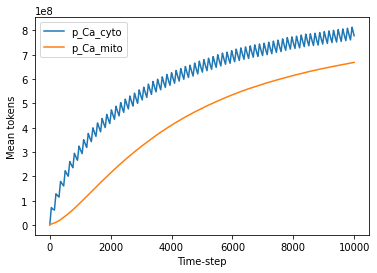

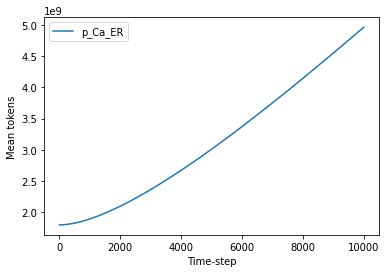

In [7]:
PDanalysis = Analysis(pn)
# output_places=['p_RTN3_PN','p_RTN3_axon']
# output_places=['p_chol_LE']
output_places=['p_Ca_mito','p_Ca_cyto']
PDanalysis.mean_run_tokens_over_time(output_places)
# output_places=['p_SNCA_act']
# PDanalysis.mean_run_tokens_over_time(output_places)
# output_places=['p_SNCA_inact']
# PDanalysis.mean_run_tokens_over_time(output_places)
# output_places=['p_SNCA_olig']
# PDanalysis.mean_run_tokens_over_time(output_places)
# output_places=['p_LB']
# PDanalysis.mean_run_tokens_over_time(output_places)
output_places=['p_Ca_ER']
PDanalysis.mean_run_tokens_over_time(output_places)